<a href="https://colab.research.google.com/github/KishikTanwar1208/Cognifyz-ML/blob/main/Project_Restaurant_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
df = pd.read_csv('Dataset .csv')

In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3.0,4.8,Dark Green,Excellent,314.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3.0,4.5,Dark Green,Excellent,591.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4.0,4.4,Green,Very Good,270.0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4.0,4.9,Dark Green,Excellent,365.0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4.0,4.8,Dark Green,Excellent,229.0


In [ ]:
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
4406,312728,Giani,1,New Delhi,"Near 15-16, Main Road, Block G, Kalkaji, New D...",Kalkaji,"Kalkaji, New Delhi",77.258148,28.540130,"Ice Cream, Desserts",...,Indian Rupees(Rs.),No,Yes,No,No,1.0,3.2,Orange,Average,17.0
4407,18025133,Gopals 56,1,New Delhi,"Opposite Deshbandhu College, Krishna Market, K...",Kalkaji,"Kalkaji, New Delhi",77.255439,28.541431,"Ice Cream, Desserts",...,Indian Rupees(Rs.),No,No,No,No,1.0,3.2,Orange,Average,8.0
4408,7329,Green Chick Chop,1,New Delhi,"10 & 12, F-7, Main Road, Kalkaji, New Delhi",Kalkaji,"Kalkaji, New Delhi",77.253761,28.542175,"Raw Meats, North Indian, Fast Food",...,Indian Rupees(Rs.),No,No,No,No,1.0,3.2,Orange,Average,26.0
4409,302892,Heaven's Kitchen,1,New Delhi,"59-60, Mini Central Market, Near Mother Dairy,...",Kalkaji,"Kalkaji, New Delhi",77.256910,28.530722,"North Indian, Mughlai, Chinese",...,Indian Rupees(Rs.),No,Yes,No,No,2.0,3.3,Orange,Average,85.0
4410,302893,Heavens Food Corner,1,New Delhi,"DDA Market, Near Mother Dairy, Kalkaji, New Delhi",Kalkaji,"Kalkaji, New Delhi",77.256989,28.530000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         4411 non-null   int64  
 1   Restaurant Name       4411 non-null   object 
 2   Country Code          4411 non-null   int64  
 3   City                  4411 non-null   object 
 4   Address               4411 non-null   object 
 5   Locality              4411 non-null   object 
 6   Locality Verbose      4411 non-null   object 
 7   Longitude             4411 non-null   float64
 8   Latitude              4411 non-null   float64
 9   Cuisines              4401 non-null   object 
 10  Average Cost for two  4410 non-null   float64
 11  Currency              4410 non-null   object 
 12  Has Table booking     4410 non-null   object 
 13  Has Online delivery   4410 non-null   object 
 14  Is delivering now     4410 non-null   object 
 15  Switch to order menu 

In [ ]:
df.shape

(4411, 21)

In [ ]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,4.411000e+03,4411.000000,4411.000000,4411.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,9.010723e+06,27.181818,55.460764,25.883016,614.488209,1.948753,2.979365,230.257596
std,8.745974e+06,69.104814,54.476653,10.474276,611.360475,0.931593,1.398345,565.640599
min,5.300000e+01,1.000000,-157.948486,-38.634746,0.000000,1.000000,0.000000,0.000000
25%,3.016990e+05,1.000000,77.030923,28.434707,250.000000,1.000000,2.800000,10.000000
50%,5.600556e+06,1.000000,77.117637,28.532966,450.000000,2.000000,3.400000,52.000000
75%,1.831195e+07,1.000000,77.239954,28.634623,750.000000,3.000000,3.900000,201.000000
max,1.850065e+07,216.000000,153.593331,52.008289,7000.000000,4.000000,4.900000,10934.000000


In [ ]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two    float64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range             float64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                   float64
dtype: object

In [ ]:
df.isnull().sum()

Restaurant ID            0
Restaurant Name          0
Country Code             0
City                     0
Address                  0
Locality                 0
Locality Verbose         0
Longitude                0
Latitude                 0
Cuisines                10
Average Cost for two     1
Currency                 1
Has Table booking        1
Has Online delivery      1
Is delivering now        1
Switch to order menu     1
Price range              1
Aggregate rating         1
Rating color             1
Rating text              1
Votes                    1
dtype: int64

In [ ]:
df.dropna(subset=['Cuisines'], inplace=True)
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

<Axes: xlabel='Aggregate rating', ylabel='Count'>

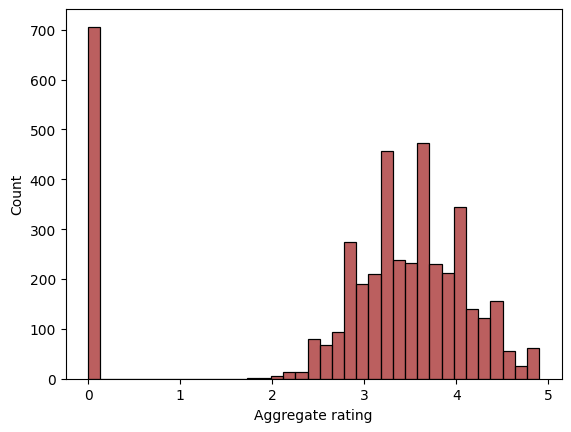

In [ ]:
sns.histplot(df['Aggregate rating'], color='brown', kde_kws={'color': 'red'})

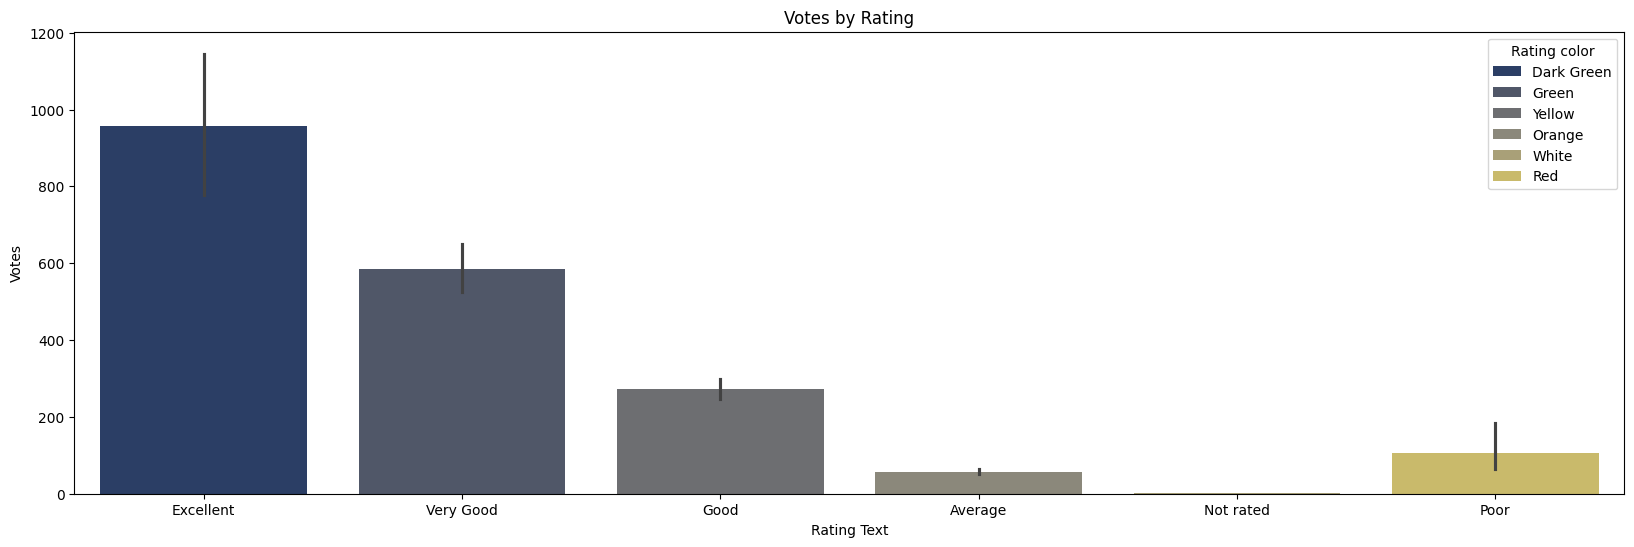

In [ ]:
plt.figure(figsize=(20, 6))
sns.barplot(x=df["Rating text"], y=df["Votes"], hue=df["Rating color"], palette="cividis")
plt.title('Votes by Rating')
plt.xlabel('Rating Text')
plt.ylabel('Votes')
plt.show()

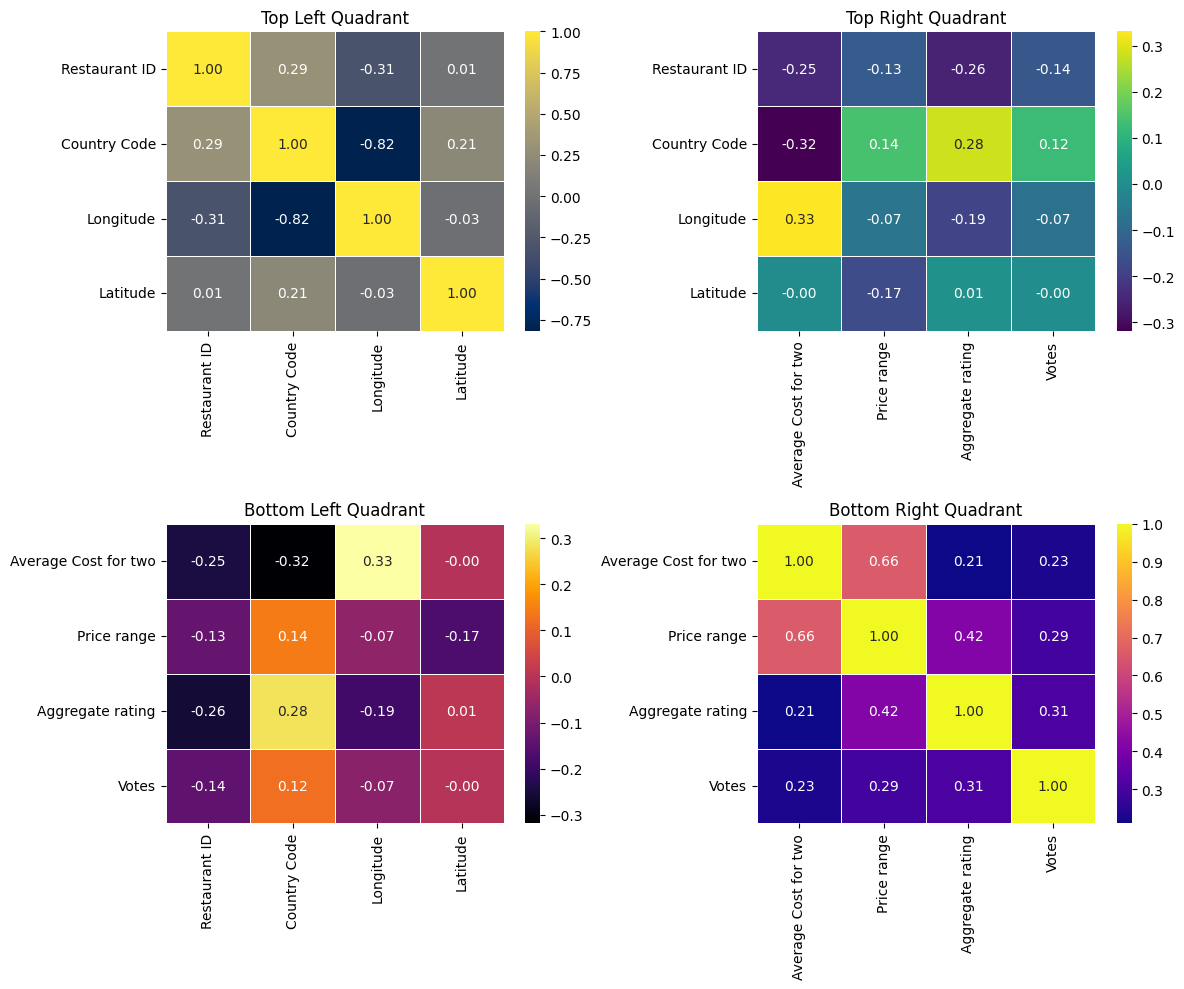

In [ ]:
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
sns.heatmap(correlation_matrix.iloc[:len(correlation_matrix)//2, :len(correlation_matrix)//2], annot=True, cmap='cividis', fmt=".2f", linewidths=0.5, ax=ax[0, 0])
ax[0, 0].set_title('Top Left Quadrant')
sns.heatmap(correlation_matrix.iloc[:len(correlation_matrix)//2, len(correlation_matrix)//2:], annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, ax=ax[0, 1])
ax[0, 1].set_title('Top Right Quadrant')
sns.heatmap(correlation_matrix.iloc[len(correlation_matrix)//2:, :len(correlation_matrix)//2], annot=True, cmap='inferno', fmt=".2f", linewidths=0.5, ax=ax[1, 0])
ax[1, 0].set_title('Bottom Left Quadrant')
sns.heatmap(correlation_matrix.iloc[len(correlation_matrix)//2:, len(correlation_matrix)//2:], annot=True, cmap='plasma', fmt=".2f", linewidths=0.5, ax=ax[1, 1])
ax[1, 1].set_title('Bottom Right Quadrant')
plt.tight_layout()
plt.show()

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
df['Cuisines'] = df['Cuisines'].fillna('')
tfidf_matrix = tfidf.fit_transform(df['Cuisines'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
def get_recommendations(user_preferences, cosine_sim, df):
    preferred_cuisines = user_preferences.get('cuisines', [])
    preferred_price_range = user_preferences.get('price_range', None)

    filtered_indices = df.index[df['Cuisines'].apply(lambda x: any(cuisine in x for cuisine in preferred_cuisines))]
    if preferred_price_range:
        filtered_indices = filtered_indices[df.loc[filtered_indices, 'Price range'] == preferred_price_range]
    sim_scores = cosine_sim[filtered_indices].sum(axis=0)
    sorted_indices = sim_scores.argsort()[::-1]
    top_indices = sorted_indices[1:4]
    return df.iloc[top_indices]

In [ ]:
user_cuisines = input("Enter your preferred cuisine(s) separated by commas: ").split(',')
user_price_range = input("Enter your preferred price range (optional): ")


Enter your preferred cuisine(s) separated by commas: Italian, Chinese, Fast Food, North Indian
Enter your preferred price range (optional): 4221


In [ ]:
user_preferences = {
    'cuisines': user_cuisines,
    'price_range': int(user_price_range) if user_price_range.isdigit() else None
}
recommendations = get_recommendations(user_preferences, cosine_sim, df)

In [ ]:
print(recommendations[['Restaurant Name', 'Cuisines', 'Price range']])

           Restaurant Name               Cuisines  Price range
1477  The Cinnamon Kitchen  North Indian, Chinese          2.0
1471        Curry n Phulka  North Indian, Chinese          2.0
1472                Jaguar  Chinese, North Indian          2.0
